# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. <br>
Бизнес задача - Определить рыночную стоимость объектов недвижимости. <br>
Задача DS — установить параметры для автоматизированной системы для отслеживания аномалий и мошеннической деятельности. <br>
<br>
Пояснение к датасету:<br>
    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)<br>
    balcony — число балконов<br>
    ceiling_height — высота потолков (м)<br>
    cityCenters_nearest — расстояние до центра города (м)<br>
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)<br>
    first_day_exposition — дата публикации<br>
    floor — этаж<br>
    floors_total — всего этажей в доме<br>
    is_apartment — апартаменты (булев тип)<br>
    kitchen_area — площадь кухни в квадратных метрах (м²)<br>
    last_price — цена на момент снятия с публикации<br>
    living_area — жилая площадь в квадратных метрах(м²)<br>
    locality_name — название населённого пункта<br>
    open_plan — свободная планировка (булев тип)<br>
    parks_around3000 — число парков в радиусе 3 км<br>
    parks_nearest — расстояние до ближайшего парка (м)<br>
    ponds_around3000 — число водоёмов в радиусе 3 км<br>
    ponds_nearest — расстояние до ближайшего водоёма (м)<br>
    rooms — число комнат<br>
    studio — квартира-студия (булев тип)<br>
    total_area — площадь квартиры в квадратных метрах (м²)<br>
    total_images — число фотографий квартиры в объявлении<br>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# Файл с особым разделителем.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
# Видим, что довольно много столбцов с отсутствующими значениями.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

1. Файл имеет особый разделитель.
2. Видим, что большая часть столбцов имеет пропуски. Из 22 с пропусками 14.
3. Не бьётся с логикой тип данных в некоторых столбцах. Например first_day_exposition - object.

### Шаг 2. Предобработка данных

In [3]:
"""
Нужно решить, какими данными мы будем запонять отсутствующие значения.
Спросить не у кого, поэтому восстановить цифровые значения возможности нет.
Есть столбцы, где указываются значения, которые клиент мог и не знать - расстояние до водоема, например. 
Имеет смысл предположить, что если значения нет, то и водоема вблизи нет.
"""

# Посмотрим, как коррелируют значения в столбцах. Может быть удастся заполнить пропуски более точно.
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


In [4]:
# Первый столбец с пропущенными значениями ceiling_height. Очевидной зависимости нет, заполняем средним.

df['ceiling_height'].fillna(df['ceiling_height'].mean(), inplace=True)

In [5]:
"""
Второй - floors_total. 
Есть 67,8% зависимости от floor, который заполнен полностью. 
Логично, если указано, что квартира на 5 этаже, этажей в доме, как минимум 5.
Приведем к типу int.
"""

df.loc[df['floors_total'].isna(), 'floors_total'] = df[df['floors_total'].isna()]['floor']
df['floors_total'] = df['floors_total'].astype(int)

In [6]:
"""
Третий - living_area. 
На 93,9% зависит от total_area. Это логично. 
Для заполнения найдем средний процент жилой площади от общей по известным данным.
Заполним living_area умножив средний процент на total_area.
"""

perc_liv = df[~df['living_area'].isna()]['living_area'].mean() / df[~df['living_area'].isna()]['total_area'].mean()

df.loc[df['living_area'].isna(), 'living_area'] = df[df['living_area'].isna()]['total_area'] * perc_liv

In [7]:
"""
Четвертый - is_apartment. 
Приведём к bool и отсутствующие заполним False.
"""

df.loc[df['is_apartment'].isna(), 'is_apartment'] = False
df['is_apartment'] = df['is_apartment'].astype(bool)

In [8]:
"""
Пятый - kitchen_area. 
Заполним по аналогии с living_area.
Нужно проконтролировать, чтобы в совокупности perc_liv и perc_kit не дали больше 100%.
"""
perc_kit = df[~df['kitchen_area'].isna()]['kitchen_area'].mean() / df[~df['kitchen_area'].isna()]['total_area'].mean()

perc_liv + perc_kit
# Получается 74,7% вполне реально, что жилая и кухня столько занимают от общей площади.

df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df[df['kitchen_area'].isna()]['total_area'] * perc_kit

In [9]:
"""
Шестой - balcony. 
Очевидной зависимости нет.
Вероятно, что отсутствующие значения, говорят об отсутствии балкона.
Приведем к типу int.
"""

df.loc[df['balcony'].isna(), 'balcony'] = 0
df['balcony'] = df['balcony'].astype(int)

In [10]:
# Седьмой - locality_name. Название города угадать не сможем. Заполним - 'Другой'

df.loc[df['locality_name'].isna(), 'locality_name'] = 'Другой'

In [11]:
"""
Восьмой - airports_nearest. 
Если значение не указано, то вероятно, клиент его мог просто не знать.
Думаю, что заполнить можно средним airports_nearest в зависимости от locality_name.
Логично, что один и тот же населенный пункт имеет примерно одинаковое расстояние.
Если значение расстояния с городом не заполнено, то угадать его мы не можем и заполним 0.
Таким образом и по такой же логике будут заполнены остальные столбцы. Напишем функцию.
"""

def dist_for_location(val):
    for name in df['locality_name'].unique():
        dist = df[df['locality_name'] == name][val].mean()
        df.loc[(df[val].isna()) & (df['locality_name'] == name), val] = dist
    df.loc[df[val].isna(), val] = 0
    
dist_for_location('airports_nearest')

In [12]:
# Девятый - cityCenters_nearest.
dist_for_location('cityCenters_nearest')

# Десятый - parks_around3000. Приведём к int.
dist_for_location('parks_around3000')
df['parks_around3000'] = df['parks_around3000'].astype(int)

# Одиннадцатый - parks_nearest.
dist_for_location('parks_nearest')

# Двенадцатый - ponds_around3000. Приведём к int.
dist_for_location('ponds_around3000')
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

# Тринадцатый - ponds_nearest
dist_for_location('ponds_nearest')

In [13]:
"""
Четырнадцатый - days_exposition.
Можно заполнить средним по городу. Если нет данных по городу, заполним средним по столбцу.
"""

for name in df['locality_name'].unique():
    days = df[df['locality_name'] == name]['days_exposition'].mean()
    df.loc[(df['days_exposition'].isna()) & (df['locality_name'] == name), 'days_exposition'] = days
df.loc[df['days_exposition'].isna(), 'days_exposition'] = df['days_exposition'].mean()
df['days_exposition'] = df['days_exposition'].astype(int)

In [14]:
# Приведём к дате first_day_exposition.

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
# Посмотрим, что получилось.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

### Вывод

Заполнили пропущенные значения, стараясь избежать искажений и потерь.
Привели значения к более подходящим типам данных - дата, либо целые значения.

### Шаг 3. Посчитайте и добавьте в таблицу

In [16]:
# Добавляем цену квадратного метра.

df['square_price'] = df['last_price'] / df['total_area']

In [17]:
# Добавляем день недели, месяц и год публикации объявления.

df['week_day'] = df['first_day_exposition'].dt.weekday
df['exp_month'] = df['first_day_exposition'].dt.month
df['exp_year'] = df['first_day_exposition'].dt.year

In [18]:
# Добавляем этаж квартиры; варианты — первый, последний, другой.

df.loc[df['floor'] == 1, 'flat_floor'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'flat_floor'] = 'последний'
df.loc[df['flat_floor'].isna(), 'flat_floor'] = 'другой'

In [19]:
# Добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей.

df['perc_liv'] = df['living_area'] / df['total_area']
df['perc_kit'] = df['kitchen_area'] / df['total_area']

In [20]:
# Всё в порядке.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

### Вывод

Использовал встроенные приёмы pandas, просто потому, что они работают быстрее, чем apply с самописной функцией, например.
В любом случае, результат аналогичен.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [21]:
# Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,0.986523
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.771499
75%,69.900000,6.800000e+06,3.000000,2.771499
max,900.000000,7.630000e+08,19.000000,100.000000


In [22]:
# Универсальный построитель гистограм.

def construct_hist(col, xl, yl, title, lw=10):
    fig, ax = plt.subplots(figsize=(10,6), dpi= 80)

    ax.vlines(x=df.index, ymin=0, ymax=col, color='skyblue', alpha=0.3, linewidth=lw)
    ax.set_title(title, fontdict={'size':16})
    ax.set(xlabel=xl, ylabel=yl)
    plt.show()

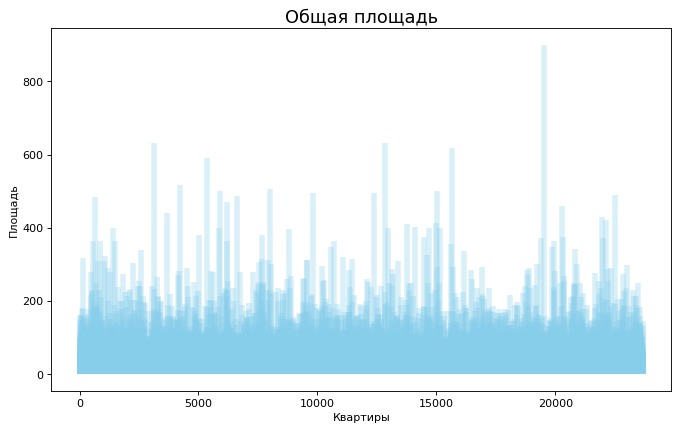

In [23]:
"""
Судя по графику, основная часть квартир меньше 200 кв.м., это можно увидеть по интенсивности цвета.
После, примерно, 400 кв.м. остаются только выбросы.
"""

construct_hist(df.total_area, "Квартиры", "Площадь", "Общая площадь", lw=5)

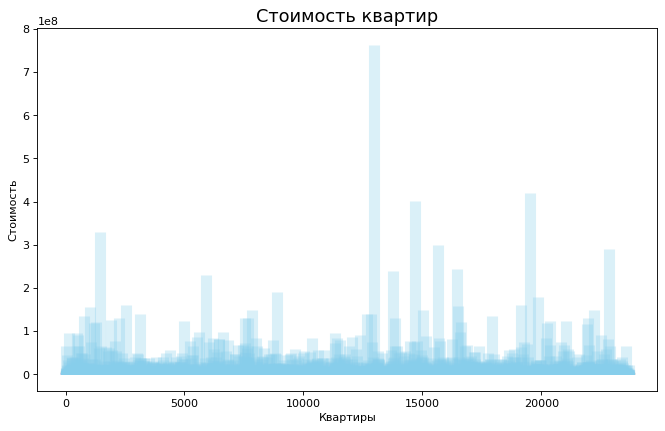

In [24]:
"""
Судя по графику, присутствует значительный выброс по цене, который портит всю картину.
Однако, даже так можно увидеть, что основная часть квартир в диапазоне цен от ~3 до ~7 млн.
"""

construct_hist(df.last_price, "Квартиры", "Стоимость", "Стоимость квартир")

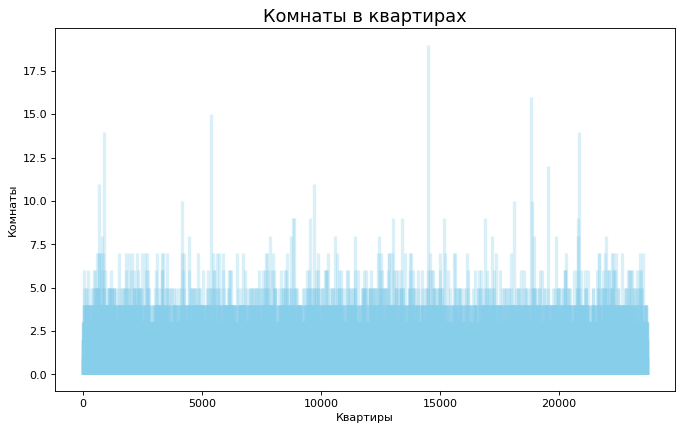

In [25]:
"""
Судя по графику, присутствует значительный выброс, но с комнатами диаграмма более ровная. 
Комнатность примерно после 4 становится редкостью.
"""

construct_hist(df.rooms, "Квартиры", "Комнаты", "Комнаты в квартирах", lw=3)

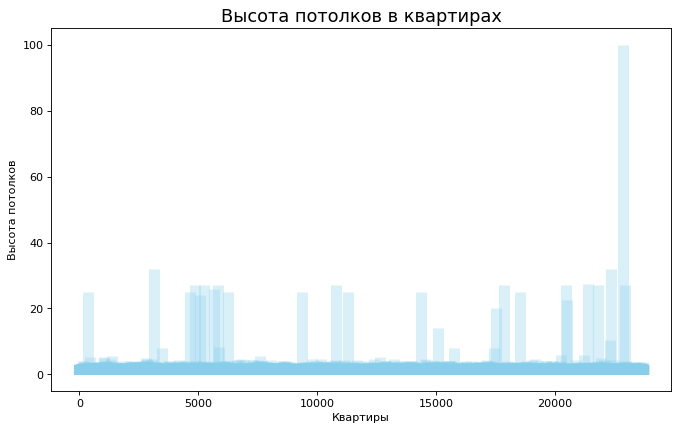

In [26]:
"""
Судя по графику, присутствует значительный выброс, но диаграмма ровная в основных значениях.
Это говорит, что большая часть квартир имеет примерно одинаковую высоту потолков.
"""

construct_hist(df.ceiling_height, "Квартиры", "Высота потолков", "Высота потолков в квартирах")

In [27]:
"""
Изучите время продажи квартиры. 

Среднее - 180.952656, медиана, это второй квартиль - 121. 
Это значит, что в большинстве случаев продажа займёт около 121 дня.
Соответственно, можно сказать, что значения ниже первого квартиля, это быстрые продажи, а выше третьего долгие.
"""

df['days_exposition'].describe()

count    23699.000000
mean       180.952656
std        204.925209
min          1.000000
25%         45.000000
50%        121.000000
75%        209.000000
max       1580.000000
Name: days_exposition, dtype: float64

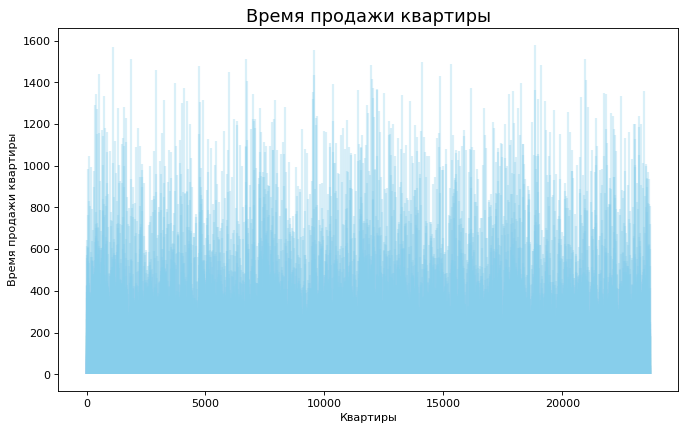

In [28]:
"""
Постройте гистограмму.

Судя по графику, продавать квартиру до 400 дней, это норма. Начиная от 800 начинаются выборосы.
"""

construct_hist(df.days_exposition, "Квартиры", "Время продажи квартиры", "Время продажи квартиры", lw=2)

In [29]:
"""
Уберите редкие и выбивающиеся значения.

Сначала определи столбцы, в которых выбросы могут "портить" весь результат анализа. 
Затем найдём значения по 1% "с концов" в каждом столбце и удалим их. Так уберем явные выбросы и максимально сохраним данные.
"""

lst = ['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']
ln = len(df)

for col in lst:
    df.drop(df[df[col] < df[col].quantile(0.01)].index, inplace=True)
    df.drop(df[df[col] > df[col].quantile(0.99)].index, inplace=True)

print(f'Потеряли {ln - len(df)} значений')

Потеряли 1772 значений


In [30]:
"""
Какие факторы больше всего влияют на стоимость квартиры? 
Изучите, зависит ли цена от площади, числа комнат, удалённости от центра.
Также изучите зависимость от даты размещения: дня недели, месяца и года.

Так как мы добавили новые столбцы, имеет смысл вызвать таблицу корреляции вновь.
Топ положительной корреляции - square_price, total_area, living_area.
Топ отрицательной корреляции - perc_kit, cityCenters_nearest, studio.
"""

df.corr().sort_values('last_price', ascending=False)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,week_day,exp_month,exp_year,perc_liv,perc_kit
last_price,0.151288,1.000000,0.765312,0.455635,0.383544,0.096214,0.646761,0.088861,0.018555,-0.012984,...,0.290454,0.290552,0.236779,0.087769,0.713662,-0.012627,-0.000573,-0.012828,0.009358,-0.083062
total_area,0.114935,0.765312,1.000000,0.783428,0.343593,-0.025399,0.924656,-0.009489,0.019228,-0.022839,...,0.116215,0.175985,0.082051,0.122531,0.169241,-0.008315,0.010955,-0.065663,0.207011,-0.336083
square_price,0.136205,0.713662,0.169241,-0.072241,0.266091,0.240645,0.066244,0.187446,0.014649,0.003760,...,0.413866,0.301261,0.376454,0.009332,1.000000,-0.012326,-0.012526,0.059454,-0.207347,0.224551
living_area,0.100246,0.646761,0.924656,0.868210,0.280871,-0.149634,1.000000,-0.100958,0.015566,-0.014277,...,0.088235,0.144604,0.074431,0.113273,0.066244,-0.004885,0.006135,-0.056066,0.536349,-0.535995
kitchen_area,0.090452,0.594334,0.574483,0.197999,0.317939,0.209673,0.332910,0.154647,0.026935,-0.020082,...,0.101091,0.146958,0.053920,0.073376,0.327223,-0.009356,0.009746,-0.039155,-0.374663,0.511612
rooms,0.090810,0.455635,0.783428,1.000000,0.144680,-0.211337,0.868210,-0.152874,-0.007072,-0.021025,...,0.051880,0.080037,0.049424,0.093097,-0.072241,-0.000907,0.003926,-0.039975,0.555878,-0.595304
ceiling_height,0.000863,0.383544,0.343593,0.144680,1.000000,-0.002443,0.280871,0.004406,0.047608,0.004761,...,0.059924,0.187544,0.031113,0.061092,0.266091,-0.003802,0.004108,-0.102839,-0.068301,0.061401
ponds_around3000,-0.001262,0.290552,0.175985,0.080037,0.187544,-0.036010,0.144604,-0.020025,0.009470,0.003850,...,0.297775,1.000000,0.176759,0.042857,0.301261,-0.000027,-0.009745,-0.041582,-0.016200,-0.003413
parks_nearest,0.037814,0.290454,0.116215,0.051880,0.059924,0.134752,0.088235,0.091824,0.000877,-0.005182,...,1.000000,0.297775,0.544164,0.003771,0.413866,-0.008132,0.005735,-0.028095,-0.021571,-0.004025
parks_around3000,0.026886,0.272997,0.155750,0.101582,0.193512,-0.146985,0.159436,-0.099196,0.004154,-0.005327,...,0.181273,0.375831,0.193400,0.035417,0.293314,-0.005528,-0.003638,-0.036033,0.070645,-0.070356


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


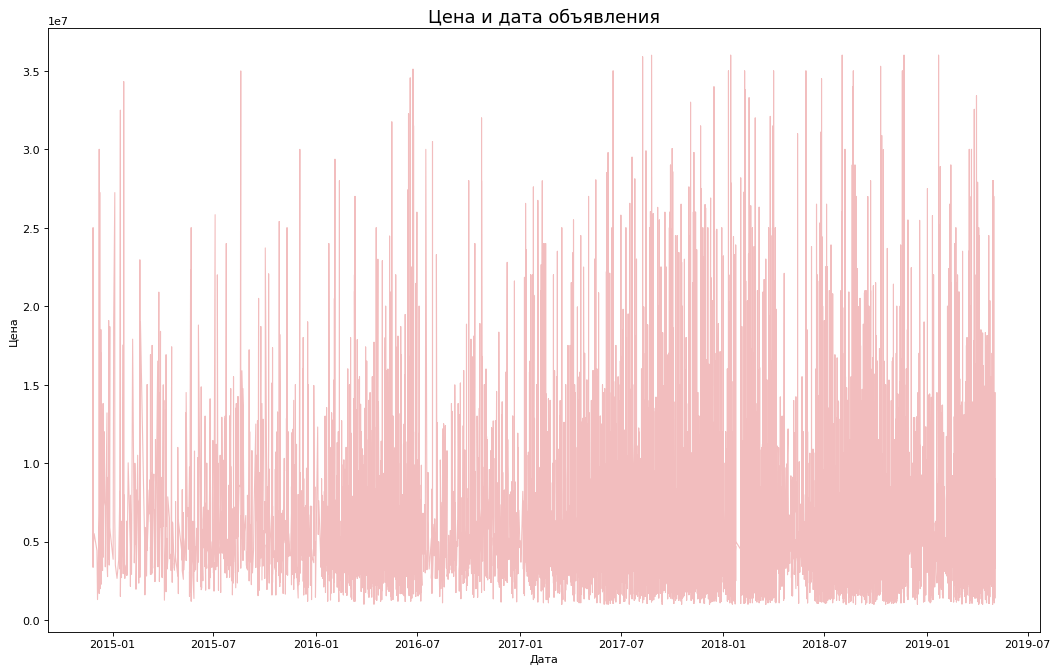

In [31]:
"""
Можем сказать, что объявлений с каждый годом становится всё больше.
Максимальная цена волнообразна - с 01.2017 повышается, с 03.2018 падает, и т.д.
Возможно влияние внешних факторов - кризисы, сезонность и т.д.
"""

df.sort_values('first_day_exposition', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
plt.plot('first_day_exposition', 'last_price', data=df, color='tab:red', alpha=0.3, linewidth=1)
ax.set_title("Цена и дата объявления", fontdict={'size':16})
ax.set(xlabel="Дата", ylabel="Цена")
plt.show()

In [32]:
"""
Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

Построим сводную таблицу для наглядности.
Видим, что цена на первый этаж снижена максимально. Последний этаж тоже имеет скидку.
"""

df.pivot_table(index='flat_floor', values='last_price', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,last_price,last_price,last_price
flat_floor,,,
другой,5.930930e+06,4800000.0,16182
первый,4.548198e+06,3950000.0,2663
последний,5.393564e+06,4300000.0,3082


In [33]:
# Выберите 10 населённых пунктов с наибольшим числом объявлений. 

top_10_city = (df[['locality_name', 'square_price']]
 .groupby('locality_name')
 .count()
 .sort_values('square_price', ascending=False)
 .head(10))

top_10_city.columns = ['count']
top_10_city

,count
locality_name,
Санкт-Петербург,14537
посёлок Мурино,471
посёлок Шушары,425
Всеволожск,384
Пушкин,347
Колпино,329
посёлок Парголово,316
Гатчина,301
деревня Кудрово,268


In [34]:
"""
Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
"""

lst = top_10_city.index

top_10_city = df.query('locality_name in @lst')
top_10_city_stat = (top_10_city.groupby('locality_name')
                     .mean()
                     .sort_values('square_price', ascending=False))
top_10_city_stat[['square_price']]

,square_price
locality_name,
Санкт-Петербург,110684.025583
Пушкин,102631.391043
деревня Кудрово,91958.752328
посёлок Парголово,90338.968285
посёлок Мурино,84666.514824
посёлок Шушары,77992.118630
Колпино,75275.427827
Гатчина,68993.546627
Всеволожск,68676.246271


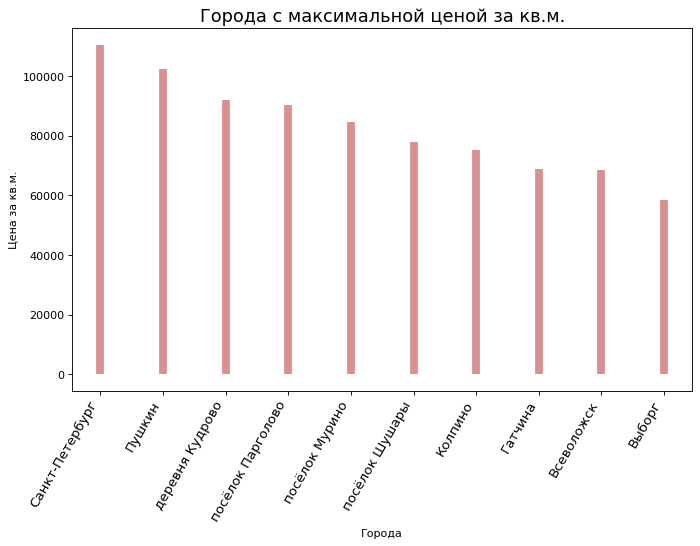

In [35]:
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)

ax.vlines(x=top_10_city_stat.index, ymin=0, ymax=top_10_city_stat.square_price, color='firebrick', alpha=0.5, linewidth=7)
ax.set_title('Города с максимальной ценой за кв.м.', fontdict={'size':16})
ax.set(xlabel='Города', ylabel='Цена за кв.м.')
plt.xticks(top_10_city_stat.index, top_10_city_stat.index, rotation=60, horizontalalignment='right', fontsize=12)
plt.show()

In [36]:
"""
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделите квартиры в Санкт-Петербурге ('locality_name'). 
Ваша задача — выяснить, какая область входит в центр. 
Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
После этого посчитайте среднюю цену для каждого километра. 

По числам можем увидеть, что центр, это с 0 по 7 км.
"""

spb_df = df[df['locality_name'] == 'Санкт-Петербург']
spb_df['km_center'] = spb_df['cityCenters_nearest'] / 1000
spb_df['km_center'] = spb_df['km_center'].round()

spb_df_stat = (spb_df
 .pivot_table(index='km_center', values='last_price', aggfunc='mean')
 .sort_values('last_price', ascending=False)).reset_index()

spb_df_stat.columns = ['km_center', 'last_price']
spb_df_stat.head(15)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,km_center,last_price
0,0.0,1.347890e+07
1,1.0,1.126553e+07
2,5.0,1.050964e+07
3,2.0,1.038566e+07
4,4.0,1.021409e+07
5,7.0,1.003471e+07
6,6.0,9.903335e+06
7,3.0,9.318849e+06
8,8.0,8.669473e+06
9,27.0,8.300000e+06


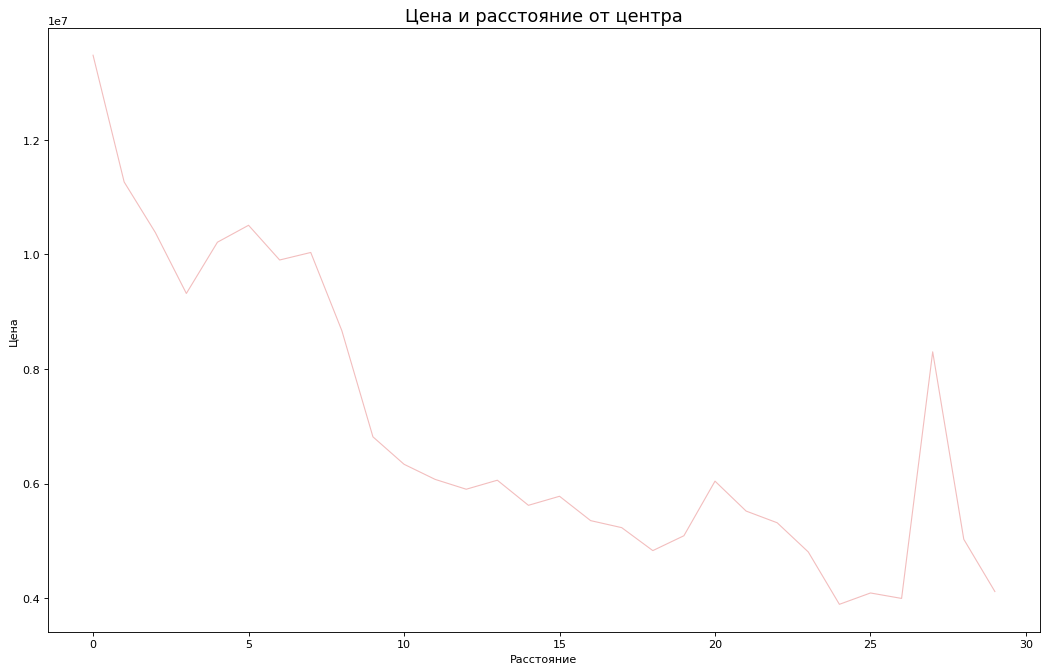

In [53]:
"""
Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
Определите границу, где график сильно меняется — это и будет центральная зона.

Как по числам, так и по графику видно, что центр, это от 0 по 7 км.
"""

# spb_df_stat.plot(x='km_center', y='last_price', kind='scatter', figsize=(7,7), grid=True)

spb_df_stat.sort_values('km_center', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
plt.plot('km_center', 'last_price', data=spb_df_stat, color='tab:red', alpha=0.3, linewidth=1)
ax.set_title("Цена и расстояние от центра", fontdict={'size':16})
ax.set(xlabel="Расстояние", ylabel="Цена")
plt.show()

In [111]:
"""
Выделите сегмент квартир в центре. 
Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

Добавлю describe для квартир не в центре.
Заметно, что средние значения серьезно различаются, за исключением высоты потолков.
Логично, что в центре квартиры больше и дороже.
"""

spb_df_cen = spb_df[spb_df['km_center'] <= 7][['total_area', 'last_price', 'rooms', 'ceiling_height']]
spb_df_cen.describe()

,total_area,last_price,rooms,ceiling_height
count,2838.000000,2.838000e+03,2838.000000,2838.000000
mean,77.869820,1.020164e+07,2.556025,2.911354
std,30.450405,5.796968e+06,1.041032,0.234312
min,27.000000,1.800000e+06,1.000000,2.500000
25%,54.150000,6.436790e+06,2.000000,2.771499
50%,73.000000,8.500000e+06,3.000000,2.771499
75%,96.450000,1.200000e+07,3.000000,3.000000
max,170.000000,3.600190e+07,5.000000,3.540000


In [112]:
spb_df_out = spb_df[spb_df['km_center'] > 7][['total_area', 'last_price', 'rooms', 'ceiling_height']]
spb_df_out.describe()

,total_area,last_price,rooms,ceiling_height
count,11699.000000,1.169900e+04,11699.000000,11699.000000
mean,55.532024,5.914501e+06,1.975041,2.701453
std,21.665515,3.163960e+06,0.899208,0.144163
min,25.200000,1.200000e+06,1.000000,2.500000
25%,40.000000,4.000000e+06,1.000000,2.600000
50%,50.000000,4.990000e+06,2.000000,2.750000
75%,65.300000,6.680000e+06,3.000000,2.771499
max,170.000000,3.600000e+07,5.000000,3.500000


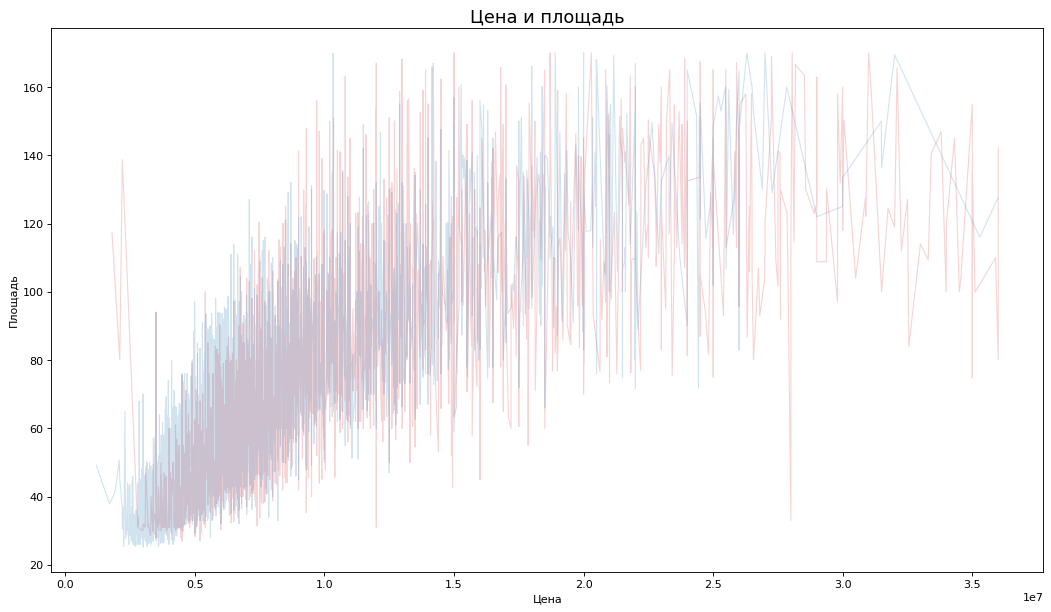

In [132]:
"""
Судя по расшифровкам, наиболее отличающиеся значения - площадь и цена. Построим по ним график.
Видим, что начало "красного", т.е. центра, стартует немного позже, из-за цены и выше из-за площади.
Значения графика центра превосходят окраину по обеим осям.
"""

spb_df_out.reset_index(drop=True, inplace=True)
spb_df_cen.reset_index(drop=True, inplace=True)

spb_df_cen.sort_values('last_price', inplace=True)
spb_df_out.sort_values('last_price', inplace=True)


def construct_plot(col, yl, title):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi= 80)
    plt.plot('last_price',col, data=spb_df_cen, color='tab:red', alpha=0.2, linewidth=1)
    plt.plot('last_price', col, data=spb_df_out, color='tab:blue', alpha=0.2, linewidth=1)
    ax.set_title(title, fontdict={'size':16})
    ax.set(xlabel="Цена", ylabel=yl)
    plt.show()

construct_plot('total_area', "Площадь", "Цена и площадь")

In [40]:
"""
Также выделите факторы, которые влияют на стоимость квартиры 
(число комнат, этаж, удалённость от центра, дата размещения объявления). 

"""

spb_df[spb_df['km_center'] <= 7].corr().sort_values('last_price', ascending=False)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,square_price,week_day,exp_month,exp_year,perc_liv,perc_kit,km_center
last_price,0.153627,1.000000,0.680715,0.355916,0.158892,0.153671,0.542446,0.175954,0.010164,-0.018469,...,0.035319,-0.035394,0.075610,0.655768,-0.003872,-0.035901,0.016065,-0.028248,-0.040365,-0.024817
total_area,0.057559,0.680715,1.000000,0.766523,0.248687,-0.009282,0.911946,0.081673,-0.005670,-0.027053,...,-0.024943,-0.015283,0.132747,-0.031962,-0.011603,-0.004158,-0.078881,0.202181,-0.316456,-0.138919
square_price,0.149493,0.655768,-0.031962,-0.243676,0.008490,0.220607,-0.125986,0.158431,0.009761,0.000265,...,0.075209,-0.035437,-0.012780,1.000000,0.004673,-0.053238,0.106219,-0.239055,0.254277,0.053249
living_area,0.045102,0.542446,0.911946,0.832582,0.262210,-0.137144,1.000000,-0.013478,0.007999,-0.021894,...,-0.033909,-0.011940,0.114626,-0.125986,-0.017880,0.009896,-0.068375,0.555063,-0.513406,-0.166724
kitchen_area,0.097258,0.522898,0.499310,0.162617,0.118991,0.122133,0.243311,0.106253,-0.007997,-0.020253,...,0.024753,-0.011250,0.109586,0.210655,0.021156,-0.048528,-0.048358,-0.395414,0.596420,-0.055852
rooms,0.029759,0.355916,0.766523,1.000000,0.230433,-0.206378,0.832582,-0.079080,-0.020070,-0.028067,...,-0.052991,-0.016921,0.092328,-0.243676,-0.014391,0.007156,-0.062741,0.491860,-0.509499,-0.186190
floor,-0.015138,0.175954,0.081673,-0.079080,-0.172999,0.662305,-0.013478,1.000000,-0.002778,0.036021,...,-0.043606,0.006830,0.001016,0.158431,0.034999,0.017436,-0.022231,-0.179788,0.063343,0.232629
ceiling_height,0.071490,0.158892,0.248687,0.230433,1.000000,-0.274369,0.262210,-0.172999,0.015078,-0.008924,...,-0.010736,-0.033613,0.056534,0.008490,-0.037527,-0.037832,0.058416,0.124597,-0.083098,-0.217151
floors_total,-0.043788,0.153671,-0.009282,-0.206378,-0.274369,1.000000,-0.137144,0.662305,0.004857,0.013083,...,-0.019982,0.014308,-0.007606,0.220607,0.028880,0.015618,-0.032804,-0.325954,0.183832,0.367965
total_images,1.000000,0.153627,0.057559,0.029759,0.071490,-0.043788,0.045102,-0.015138,0.014385,-0.019429,...,-0.020412,0.003354,-0.042337,0.149493,0.024047,-0.016746,0.154219,-0.010621,0.042824,-0.001017


In [41]:
spb_df[spb_df['km_center'] > 7].corr().sort_values('last_price', ascending=False)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,square_price,week_day,exp_month,exp_year,perc_liv,perc_kit,km_center
last_price,0.165831,1.000000,0.837097,0.498397,0.333554,0.189540,0.700790,0.144733,0.008640,-0.013825,...,0.156636,-0.073539,0.081484,0.587069,-0.003301,-0.000072,0.035538,-0.009154,-0.103215,-0.188993
total_area,0.127551,0.837097,1.000000,0.767505,0.267463,0.107083,0.920051,0.062810,0.009046,-0.020129,...,0.117028,-0.042636,0.108914,0.095488,0.000719,0.011341,-0.038813,0.180763,-0.327921,-0.078004
living_area,0.108132,0.700790,0.920051,0.872433,0.168345,-0.055735,1.000000,-0.047014,-0.001635,-0.011193,...,0.072952,-0.019659,0.095066,-0.043054,0.003331,0.000492,-0.028177,0.529387,-0.544385,-0.096917
kitchen_area,0.093034,0.638302,0.586713,0.173049,0.321099,0.322653,0.332116,0.215844,0.022659,-0.017532,...,0.129908,-0.064234,0.072895,0.335904,-0.011932,0.017322,-0.025146,-0.391664,0.513292,-0.020810
square_price,0.151984,0.587069,0.095488,-0.198043,0.247641,0.278431,-0.043054,0.226450,0.005288,0.004431,...,0.111401,-0.064241,0.002138,1.000000,-0.003681,-0.025478,0.158015,-0.311685,0.322232,-0.252636
rooms,0.091936,0.498397,0.767505,1.000000,0.022166,-0.168272,0.872433,-0.126498,-0.018083,-0.017367,...,0.021706,-0.008497,0.074375,-0.198043,0.000980,0.001961,-0.016078,0.573146,-0.615357,-0.066548
ceiling_height,-0.025080,0.333554,0.267463,0.022166,1.000000,0.174972,0.168345,0.120214,0.067956,0.016244,...,0.120915,-0.061685,0.052209,0.247641,0.003196,0.012991,-0.146149,-0.179400,0.139192,-0.098945
floors_total,0.040424,0.189540,0.107083,-0.168272,0.174972,1.000000,-0.055735,0.621569,-0.030212,0.009346,...,0.019243,-0.028957,0.004638,0.278431,0.021695,0.002542,-0.006967,-0.410347,0.340386,0.093924
total_images,1.000000,0.165831,0.127551,0.091936,-0.025080,0.040424,0.108132,0.047456,0.010113,-0.002436,...,-0.017350,-0.007507,-0.011058,0.151984,-0.014722,0.008028,0.150459,-0.002218,-0.026658,-0.006833
ponds_around3000,-0.017350,0.156636,0.117028,0.021706,0.120915,0.019243,0.072952,0.027004,0.000053,0.007819,...,1.000000,-0.070985,0.027440,0.111401,-0.004382,0.001128,-0.002755,-0.075431,0.048170,0.049758


### Вывод

Таким образом можно увидеть, что для всей выборки, как и для центра Санкт-Петербурга на цену квартиры влияют:
square_price, total_area и living_area.

А вот для Санкт-Петербурга дальше от центра на цену больше влияет площадь:
total_area, living_area, kitchen_area.

### Шаг 5. Общий вывод

Получив неидеальную выгрузку, мы всё же смогли получить полезную информацию.
Максимально бережно отработали пропущенные значения и так же избавились от выбросов.
Добавили в такблицу данные, которые помогают классифицировать объекты, либо же предоставляют необходимые вычисления.
С помощью графиков оценили разброс значений и избавились от выбросов.
Далее проанализировали экономическую составляющую.
Полученные данные можно будет учесть в работе.
Задача по определению рыночной стоимости выполнена. Данные можно будет использовать для построения автоматизированной антифрод системы.